Einführung in SciPy und SymPy
=============================

1. IPython Grundlagen
------------------------

IPython ist eine interaktive Shell für Python. Startet man IPython mit

`> ipython notebook`

wird ein lokaler Webserver gestartet, so daß man mit
einem Browser neue Notebooks erstellen und editieren kann.

Ein Notebook besteht aus mehreren "Zellen" (Cells) die Python-Code oder
Markdown-formatierten Text enthalten können.


In [2]:
import numpy as np
print(np.__version__)
np

1.9.2


<module 'numpy' from '/home/speter/anaconda/lib/python2.7/site-packages/numpy/__init__.pyc'>

Code-Zellen enthalten eine auch mehrzeilige Eingabe.

Ausgeführt wird der Code in der Zelle mit `CTRL + RETURN`.

Eventuelle Ausgaben auf `sys.stdout` oder `sys.stderr` erscheinen direkt nach der Eingabebereich,
und der letzte Ausdruck wird im gesonderten Ausgabebereich angezeigt

In [3]:
np?

2. numpy Arrays
---------------

Das Grundlegenste Objekt in numpy ist das `array`.
Es ist ein mehrdimensionaler Container für Elemente des gleichen Typs.

In [4]:
np.array?

In [5]:
a = np.array([1,2,3,4], dtype=np.float32)
a

array([ 1.,  2.,  3.,  4.], dtype=float32)

In [6]:
a.shape, a.dtype

((4,), dtype('float32'))

In [7]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [8]:
b = a.reshape( (2,2) )
b

array([[ 1.,  2.],
       [ 3.,  4.]], dtype=float32)

In [9]:
b.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

Man hieran erkennen, dass `a` eigene Daten besitzt (`OWNDATA: True`) und `b` nicht.
Das spart natürlich Speicher, kann aber auch leicht zu schwer lokalisierbaren Fehlern führen,
denn bei Änderungen an einem Objekt ändert sich auch das andere.


In [10]:
c = np.array( np.reshape(a, (2,2)) )
c.flags.owndata

True

Lineare Bereiche kann man mit `linspace` erstellen.
Man beachte, dass der Parameter `num` einen etwas willkürlichen Standardwert von 50 hat,
und man daher besser immer die gewünsche Anzahl eingeben sollte.

In [11]:
lin = np.linspace(1.0, 42.0, 42)
lin

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.])

### Arithmetik

In [12]:
lin + 1

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.])

Was ist da passiert? Die `1` wurde zu jedem Array-Element hinzuaddiert!

Das Verhalten nennt sich `broadcasting`: Was nicht passt, wird passend gemacht, 

In [13]:
lin*lin

array([  1.00000000e+00,   4.00000000e+00,   9.00000000e+00,
         1.60000000e+01,   2.50000000e+01,   3.60000000e+01,
         4.90000000e+01,   6.40000000e+01,   8.10000000e+01,
         1.00000000e+02,   1.21000000e+02,   1.44000000e+02,
         1.69000000e+02,   1.96000000e+02,   2.25000000e+02,
         2.56000000e+02,   2.89000000e+02,   3.24000000e+02,
         3.61000000e+02,   4.00000000e+02,   4.41000000e+02,
         4.84000000e+02,   5.29000000e+02,   5.76000000e+02,
         6.25000000e+02,   6.76000000e+02,   7.29000000e+02,
         7.84000000e+02,   8.41000000e+02,   9.00000000e+02,
         9.61000000e+02,   1.02400000e+03,   1.08900000e+03,
         1.15600000e+03,   1.22500000e+03,   1.29600000e+03,
         1.36900000e+03,   1.44400000e+03,   1.52100000e+03,
         1.60000000e+03,   1.68100000e+03,   1.76400000e+03])

Die Multiplikation ist bei `arrays` immer komponentenweise.

### Beispiel: Die Mandelbrot-Menge

Betrachte die Folgen $z_{n+1} = z_n + c$ für alle $c\in \mathbb{C}$, $-2 < \textrm{Re } c < 1$, $-1 < \textrm{Im } c < 1$

Zeige alle $c$ die beschränkt bleiben.

In [14]:
c = np.linspace(-2, 1, 800)+np.linspace(-1, 1, 600).reshape(600,1)*(0+1j)
c.shape, c[0,0], c[599,799]

((600, 800), (-2-1j), (1+1j))

In [15]:
def mandel(c):
    z = np.zeros_like(c)
    for i in range(10):
        z = z*z + c
    return z
z = mandel(c)
z[0,0]

(-9.2568536143635449e+133+9.3386771787027272e+133j)

### Performancemessung

Mit der %timeit Direktive kann man in IPython einfach die Geschwindigkeit einer Funktion messen:

In [16]:
%timeit mandel(c)

10 loops, best of 3: 143 ms per loop


In [17]:
(abs(z)<100.0)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

3. matplotlib
----------

In [18]:
%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt

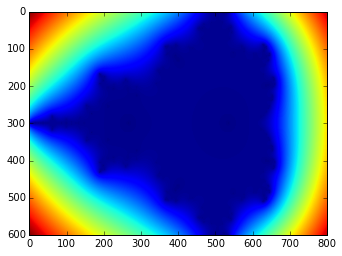

In [19]:
plt.imshow(np.log(abs(z)))

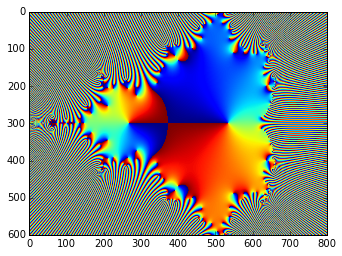

In [20]:
plt.imshow(np.angle(z))

In [59]:
def mandel2(c, numIter=10, maxabs=5):
    z = c
    num = np.zeros_like(c, dtype=np.int16)
    for i in range(numIter):
        mask = (abs(z)<maxabs)
        z = mask*(z**2 + c)
        num += (abs(z)<maxabs)
    return z, num

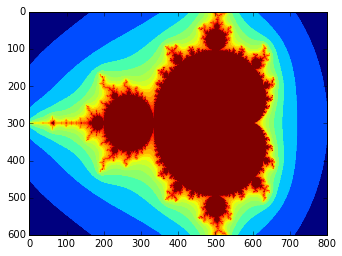

In [64]:
z, num = mandel2(c, 100, 5)
plt.imshow(num);